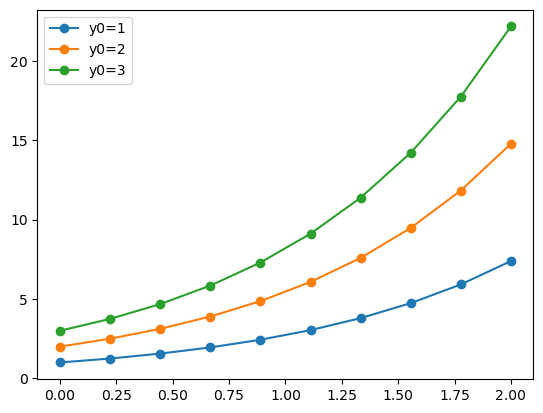

In [2]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def func(t, y):
    return y

t = np.linspace(0,2,10)
sol = solve_ivp(func, [0, 2], [1, 2, 3], t_eval=t)
plt.plot(sol.t, sol.y[0], label='y0=1', marker='o')
plt.plot(sol.t, sol.y[1], label='y0=2', marker='o')
plt.plot(sol.t, sol.y[2], label='y0=3', marker='o')
#plt.yscale('log')
plt.legend()
plt.show()

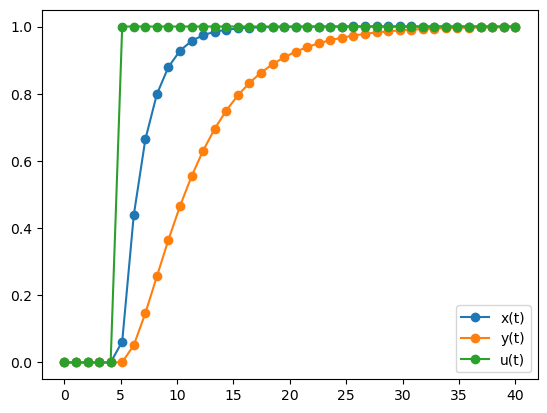

In [3]:
def u(t):
    if t < 5: return 0
    else: return 1
def func(t, x):
    x_1 = 0.5*(-x[0]+u(t))
    y_1 = 0.2*(-x[1]+x[0])
    return [x_1, y_1]

t = np.linspace(0,40,40)
sol = solve_ivp(func, [0, 40], [0, 0], t_eval=t, method='BDF')
plt.plot(sol.t, sol.y[0], label='x(t)', marker='o')
plt.plot(sol.t, sol.y[1], label='y(t)', marker='o')
plt.plot(t, [u(i) for i in t], label='u(t)', marker='o')
#plt.yscale('log')
plt.legend()
plt.show()


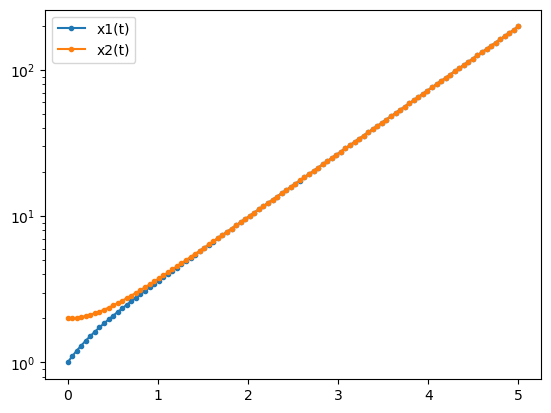

In [4]:
def func(t, x):
    x_1 = x[1]
    x_2 = 2*x[0] - x[1]
    #print(f't={t}, x={x}, dxdt={x_1}, dydt={y_1}')
    return [x_1, x_2]

t = np.linspace(0,5,100)
sol = solve_ivp(func, [0, 5], [1, 2], t_eval=t, method='LSODA')
plt.plot(sol.t, sol.y[0], label='x1(t)', marker='.')
plt.plot(sol.t, sol.y[1], label='x2(t)', marker='.')
plt.yscale('log')
plt.legend()
plt.show()


# SHO

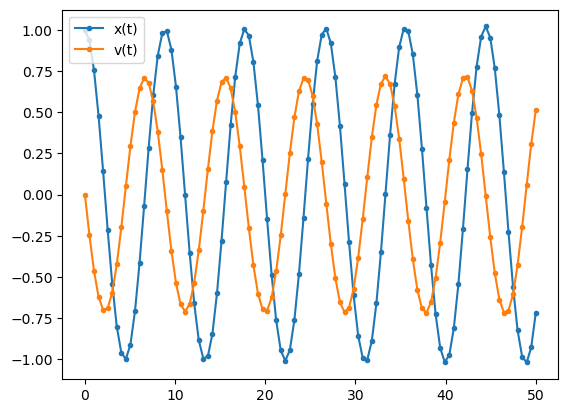

In [5]:
def func(t, x, k, m):
    dxdt = x[1]
    dvdt = (-k/m)*x[0]
    return [dxdt, dvdt]

m, k = 1, 0.5
t = np.linspace(0,50,100)
sol = solve_ivp(func, [0, 50], [1, 0], t_eval=t, method='LSODA', args=(k, m))
plt.plot(sol.t, sol.y[0], label='x(t)', marker='.')
plt.plot(sol.t, sol.y[1], label='v(t)', marker='.')
#plt.yscale('log')
plt.legend()
plt.show()


# Three vars

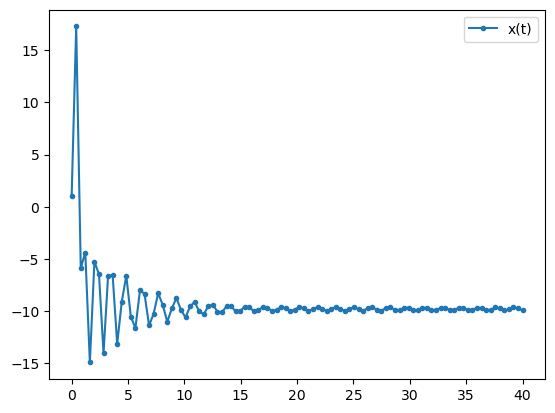

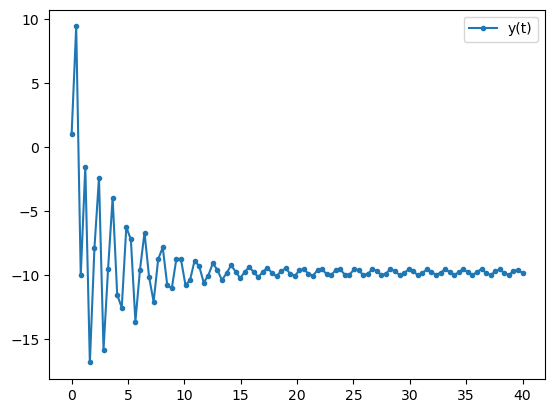

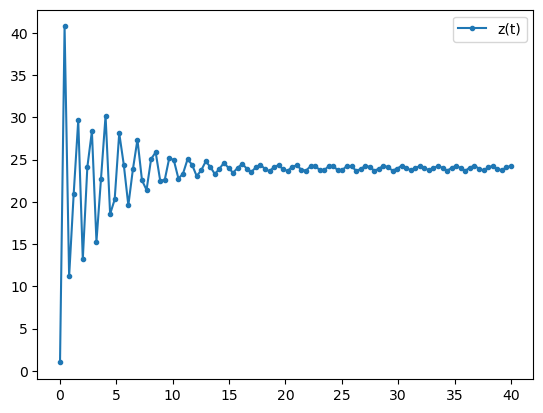

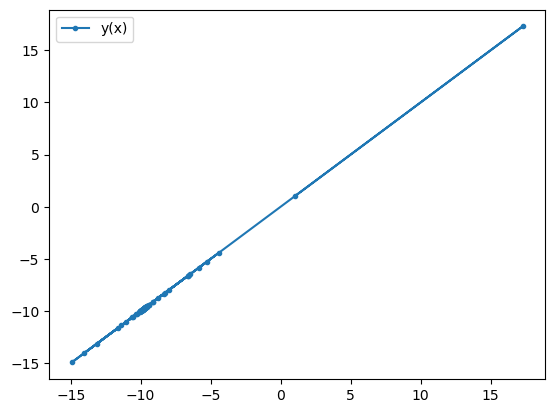

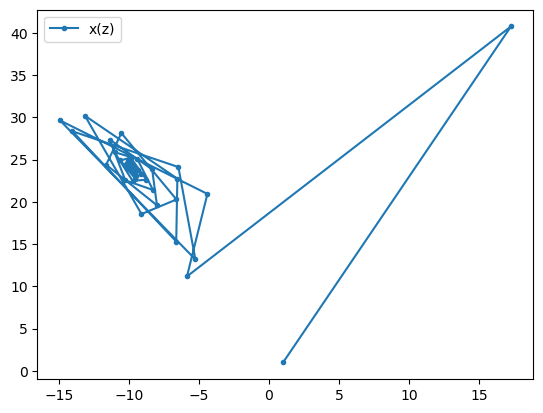

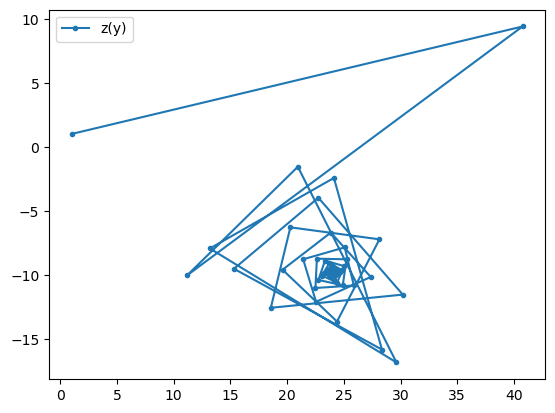

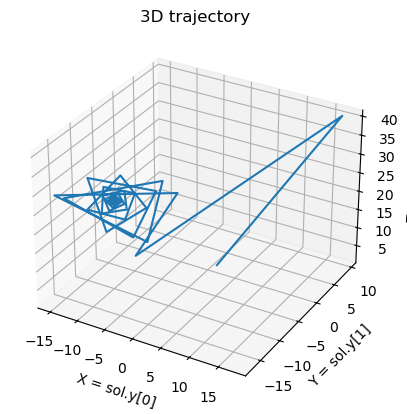

In [6]:
def func(t, x, s, b, r):
    dxdt = s*(x[1] - x[0])
    dydt = x[0] * (r - x[2]) - x[1]
    dzdt = x[0]*x[1] - b*x[2]
    return [dxdt, dydt, dzdt]

s, b, r = 10, 4, 25
t = np.linspace(0,40,100)
sol = solve_ivp(func, [0, 40], [1, 1, 1], t_eval=t, method='RK45', args=(s, b, r))
plt.plot(sol.t, sol.y[0], label='x(t)', marker='.')
plt.legend()
plt.show()
plt.plot(sol.t, sol.y[1], label='y(t)', marker='.')
plt.legend()
plt.show()
plt.plot(sol.t, sol.y[2], label='z(t)', marker='.')
plt.legend()
plt.show()
plt.plot(sol.y[0], sol.y[0], label='y(x)', marker='.')
plt.legend()
plt.show()
plt.plot(sol.y[0], sol.y[2], label='x(z)', marker='.')
plt.legend()
plt.show()
plt.plot(sol.y[2], sol.y[1], label='z(y)', marker='.')
plt.legend()
plt.show()
#plt.yscale('log')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=1.5)
ax.set_xlabel('X = sol.y[0]')
ax.set_ylabel('Y = sol.y[1]')
ax.set_zlabel('Z = sol.y[2]')
ax.set_title('3D trajectory')
plt.show()



# 2nd order DE

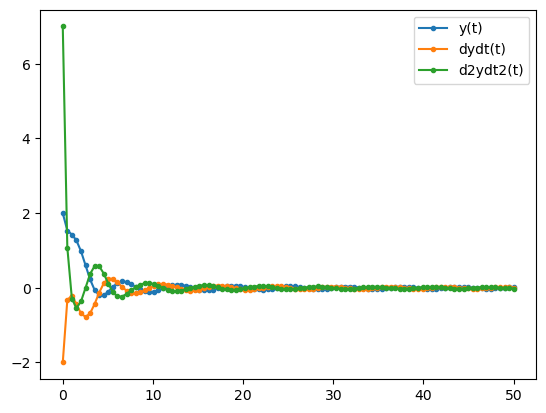

: 

In [ ]:
def func(t, x):
    dydt = x[1]
    dzdt = np.cos(t) -t*x[0] -3*(x[1])
    return [dydt, dzdt]

t = np.linspace(0,50,100)
sol = solve_ivp(func, [0, 50], [2, -2], t_eval=t, method='LSODA')
plt.plot(sol.t, sol.y[0], label='y(t)', marker='.')
plt.plot(sol.t, sol.y[1], label='dydt(t)', marker='.')
plt.plot(sol.t, [(np.cos(t) - t*y -3*z) for t,y,z in zip(sol.t, sol.y[0], sol.y[1])], label='d2ydt2(t)', marker='.')
#plt.yscale('log')
plt.legend()
plt.show()


# Exp Matrix

shape of alt=(20, 3)


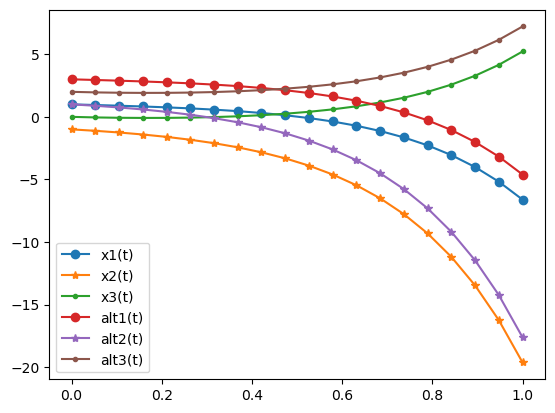

In [25]:
import numpy as np
from scipy.integrate import solve_ivp
import scipy.linalg as la
import matplotlib.pyplot as plt

A = np.array([[0, 1, -2], [1, 3, -1], [-2, -1, -2]])
def func(t, x):
    #print(f'A={A}\nx={x}')
    dxdt = A @ x
    return [dxdt]

t = np.linspace(0,1,20)
sol = solve_ivp(func, [0, 1], [1, -1, 0], t_eval=t, method='LSODA')
plt.plot(sol.t, sol.y[0], label='x1(t)', marker='o')
plt.plot(sol.t, sol.y[1], label='x2(t)', marker='*')
plt.plot(sol.t, sol.y[2], label='x3(t)', marker='.')

alt = np.array([la.expm(A*ti)@np.array([1, -1, 0]) for ti in t])
print(f'shape of alt={alt.shape}')
plt.plot(t, 2+alt[:,0], label='alt1(t)', marker='o')
plt.plot(t, 2+alt[:,1], label='alt2(t)', marker='*')
plt.plot(t, 2+alt[:,2], label='alt3(t)', marker='.')

#plt.yscale('log')
plt.legend()
plt.show()


# Projectile motion

vx=98.76883405951378, vy=15.643446504023087
vx=95.10565162951535, vy=30.901699437494738
vx=92.38795325112868, vy=38.268343236508976
vx=86.60254037844388, vy=49.99999999999999
vx=70.71067811865476, vy=70.71067811865474
vx=50.000000000000014, vy=86.60254037844386
vx=30.901699437494745, vy=95.10565162951535
vx=14.231483827328534, vy=98.98214418809327


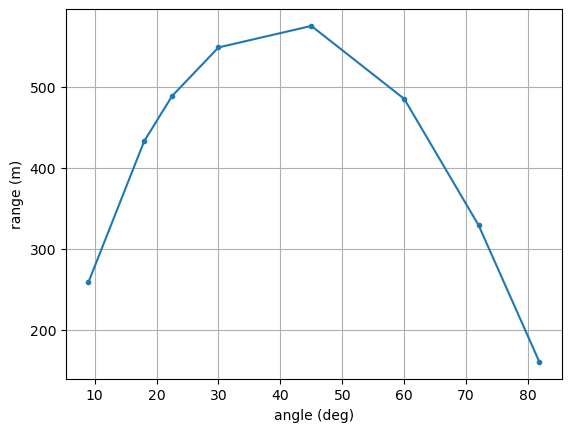

"\nplt.plot(sol.t, sol.y[0]/10, label='x(t)/10', marker='o')\nplt.plot(sol.t, sol.y[1]/2, label='y(t)', marker='o')\nplt.plot(sol.t, sol.y[2], label='vx(t)', marker='*')\nplt.plot(sol.t, sol.y[3], label='vy(t)', marker='.')\nplt.legend()\nplt.show()\n"

In [ ]:
def func(t, x, b, g):
    x, y, vx, vy = x[0], x[1], x[2], x[3]
    v = np.sqrt(vx*vx+vy*vy)
    dvxdt = -b*v*vx
    dvydt = -g - b*v*vy
    return [vx, vy, dvxdt, dvydt]

def range(theta):
    t = np.linspace(0,20,100)
    g = 9.8
    b = 0.0011

    vx=100*np.cos(theta)
    vy=100*np.sin(theta)
    print(f'vx={vx}, vy={vy}')
    sol = solve_ivp(func, [0, 25], [0, 0, vx, vy], t_eval=t, method='LSODA', args=(b, g))
    for i,y in enumerate(sol.y[1]):
        if i>0 and y <= 0:
            return sol.y[0][i]

angles = [ np.pi/frac for frac in [20,10,8,6,4,3,2.5,2.2]]
ranges = [range(angle) for angle in angles]
plt.plot(np.array(angles)*180/np.pi, ranges, marker='.')
plt.xlabel("angle (deg)")
plt.ylabel("range (m)")
plt.grid()
plt.show()

"""
plt.plot(sol.t, sol.y[0]/10, label='x(t)/10', marker='o')
plt.plot(sol.t, sol.y[1]/2, label='y(t)', marker='o')
plt.plot(sol.t, sol.y[2], label='vx(t)', marker='*')
plt.plot(sol.t, sol.y[3], label='vy(t)', marker='.')
plt.legend()
plt.show()
"""